In [4]:
import os
import string
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import json


In [5]:

# Constants
INPUT_SHAPE = (256, 256, 1)
BATCH_SIZE = 32
EPOCHS = 35
TRAIN_PATH = '/Users/aditya/Documents/GitHub/ASL/DATASET/SPLIT/train'
TEST_PATH = '/Users/aditya/Documents/GitHub/ASL/DATASET/SPLIT/test'
SAVE_PATH = '/Users/aditya/Documents/GitHub/ASL/Model_ASL_35.keras'

def build_cnn_model(num_classes):
    model = models.Sequential([
        layers.Conv2D(16, (3, 3), activation='relu', input_shape=INPUT_SHAPE),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(32, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Conv2D(64, (3, 3), activation='relu'),
        layers.MaxPooling2D((2, 2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dropout(0.5),
        layers.Dense(num_classes, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()
    return model



# Function to prepare data generators
def prepare_data_generator(data_dir, augment=False):
    datagen_args = {'rescale': 1.0 / 255}
    if augment:
        datagen_args.update({
            'rotation_range': 20,
            'width_shift_range': 0.2,
            'height_shift_range': 0.2,
            'shear_range': 0.2,
            'zoom_range': 0.2,
            'horizontal_flip': True,
            'fill_mode': 'nearest'
        })
    datagen = ImageDataGenerator(**datagen_args)
    alphabet_letters = string.ascii_uppercase
    classes = [folder for folder in os.listdir(data_dir) if folder.upper() in alphabet_letters]
    return datagen.flow_from_directory(
        data_dir,
        target_size=INPUT_SHAPE[:2],
        batch_size=BATCH_SIZE,
        color_mode='grayscale',
        class_mode='categorical',
        classes=classes
    )

# Prepare training and test data
train_generator = prepare_data_generator(TRAIN_PATH, augment=True)
test_generator = prepare_data_generator(TEST_PATH, augment=False)


# Build
cnn_model = build_cnn_model(num_classes=len(train_generator.class_indices))



Found 11524 images belonging to 17 classes.
Found 2882 images belonging to 17 classes.


/opt/anaconda3/envs/WASL/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 254, 254, 16)   │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 127, 127, 16)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 125, 125, 32)   │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 62, 62, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 60, 60, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 57600)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     3,686,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 17)             │         1,105 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,710,865 (14.16 MB)

 Trainable params: 3,710,865 (14.16 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
#  train the model
history = cnn_model.fit(train_generator, epochs=EPOCHS)

# Save the history object
with open('history.json', 'w') as f:
    json.dump(history.history, f)
print("Training history saved to history.json")

# Evaluate the model
evaluation_result = cnn_model.evaluate(test_generator)
print(f"Test Loss: {evaluation_result[0]:.4f}, Test Accuracy: {evaluation_result[1]:.4f}")

# Save and reload the model
cnn_model.save(SAVE_PATH)
print(f"Model saved at {SAVE_PATH}")

/opt/anaconda3/envs/WASL/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 200s 551ms/step - accuracy: 0.1030 - loss: 2.7679
Epoch 2/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 199s 550ms/step - accuracy: 0.2470 - loss: 2.3282
Epoch 3/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 201s 556ms/step - accuracy: 0.3353 - loss: 2.0001
Epoch 4/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 198s 549ms/step - accuracy: 0.3840 - loss: 1.8075
Epoch 5/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 198s 547ms/step - accuracy: 0.4407 - loss: 1.6253
Epoch 6/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 196s 543ms/step - accuracy: 0.4829 - loss: 1.4920
Epoch 7/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 198s 548ms/step - accuracy: 0.5109 - loss: 1.4065
Epoch 8/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 196s 542ms/step - accuracy: 0.5246 - loss: 1.3720
Epoch 9/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 197s 547ms/step - accuracy: 0.5492 - loss: 1.2953
Epoch 10/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 197s 545ms/step - accuracy: 0.5748 - loss: 1.2431
Epoch 11/35
361/361 ━━━━━━━━━━━━━━━━━━━━ 196s 543ms/step - accuracy: 0.5844 - loss: 1.1978
Epoch 12

In [13]:
LOAD_PATH = '/Users/aditya/Documents/GitHub/ASL/Model_test_1.keras'

loaded_model = tf.keras.models.load_model(SAVE_PATH)
print("Model reloaded successfully!")

Model reloaded successfully!


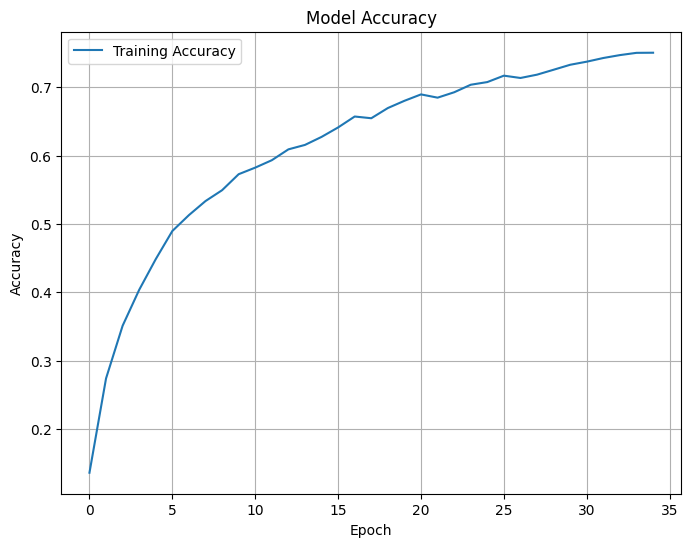

In [14]:
# Load the history object
with open('history.json', 'r') as f:
    loaded_history = json.load(f)

# Plot training accuracy
plt.figure(figsize=(8, 6))
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()


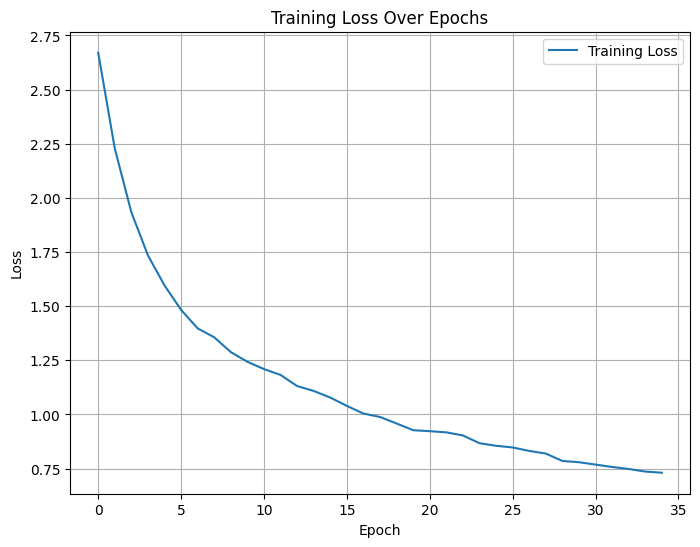

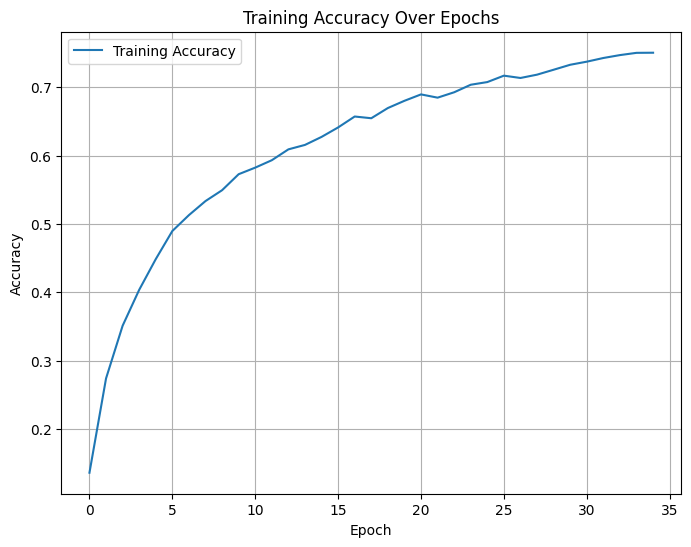

In [15]:
import matplotlib.pyplot as plt
import json

# Load the saved history
with open('history.json', 'r') as f:
    loaded_history = json.load(f)

# Plot Training Loss
plt.figure(figsize=(8, 6))
plt.plot(loaded_history['loss'], label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

# Plot Training Accuracy
plt.figure(figsize=(8, 6))
plt.plot(loaded_history['accuracy'], label='Training Accuracy')
plt.title('Training Accuracy Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid()
plt.show()

# Plot Validation Loss
if 'val_loss' in loaded_history:
    plt.figure(figsize=(8, 6))
    plt.plot(loaded_history['val_loss'], label='Validation Loss', color='red')
    plt.title('Validation Loss Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid()
    plt.show()

# Plot Validation Accuracy
if 'val_accuracy' in loaded_history:
    plt.figure(figsize=(8, 6))
    plt.plot(loaded_history['val_accuracy'], label='Validation Accuracy', color='green')
    plt.title('Validation Accuracy Over Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.grid()
    plt.show()


In [16]:
import numpy as np

# Predict on the test set
predictions = cnn_model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

# Count correct predictions
correct_predictions = np.sum(predicted_classes == true_classes)
test_accuracy = correct_predictions / len(true_classes)

# Display test accuracy
print(f"Test Accuracy: {test_accuracy:.4f}")


91/91 ━━━━━━━━━━━━━━━━━━━━ 17s 187ms/step
Test Accuracy: 0.0649


In [17]:
import cv2
import rembg
from PIL import Image
import numpy as np
import random
from IPython.display import Image as IPImage, display

# Function to capture an image from the default camera, remove the background, and preprocess it
def capture_and_preprocess():
    # Open the default camera (camera index 0)
    cap = cv2.VideoCapture(0)

    # Allow the camera to adjust (you may need to adjust the delay based on your camera)
    cv2.waitKey(1000)

    # Read a frame from the camera
    ret, frame = cap.read()

    # Release the camera capture
    cap.release()

    if ret:
        # Convert the OpenCV frame to a PIL Image
        pil_image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

        # Use rembg to remove the background
        with rembg.remove(pil_image) as result:
            # Convert the result to an OpenCV format
            sign = cv2.cvtColor(np.array(result), cv2.COLOR_RGBA2BGRA)

        # Convert the image to grayscale
        grayscale_image = cv2.cvtColor(sign, cv2.COLOR_BGRA2GRAY)

        # Resize the image to the target size (256x256)
        target_size = (256, 256)
        resized_image = cv2.resize(grayscale_image, target_size)

        # Remove random noise (salt and pepper noise)
        noisy_image = Image.fromarray(resized_image)
        noisy_image = noisy_image.point(lambda p: p + random.choice([-50, 0, 50]) if random.random() < 0.05 else p)

        # Convert the noisy image back to NumPy array
        noisy_image_np = np.array(noisy_image)

        return frame, noisy_image_np
    else:
        print("Failed to capture an image.")
        return None

from gtts import gTTS
from IPython.display import Audio
from io import BytesIO

def text_to_speech(text):
    # Create a gTTS object with the desired text
    tts = gTTS(text=text, lang='en')

    # Save the generated speech to a BytesIO object
    audio_stream = BytesIO()
    tts.write_to_fp(audio_stream)
    audio_stream.seek(0)

    # Display the generated audio
    return Audio(data=audio_stream.read(), autoplay=True)





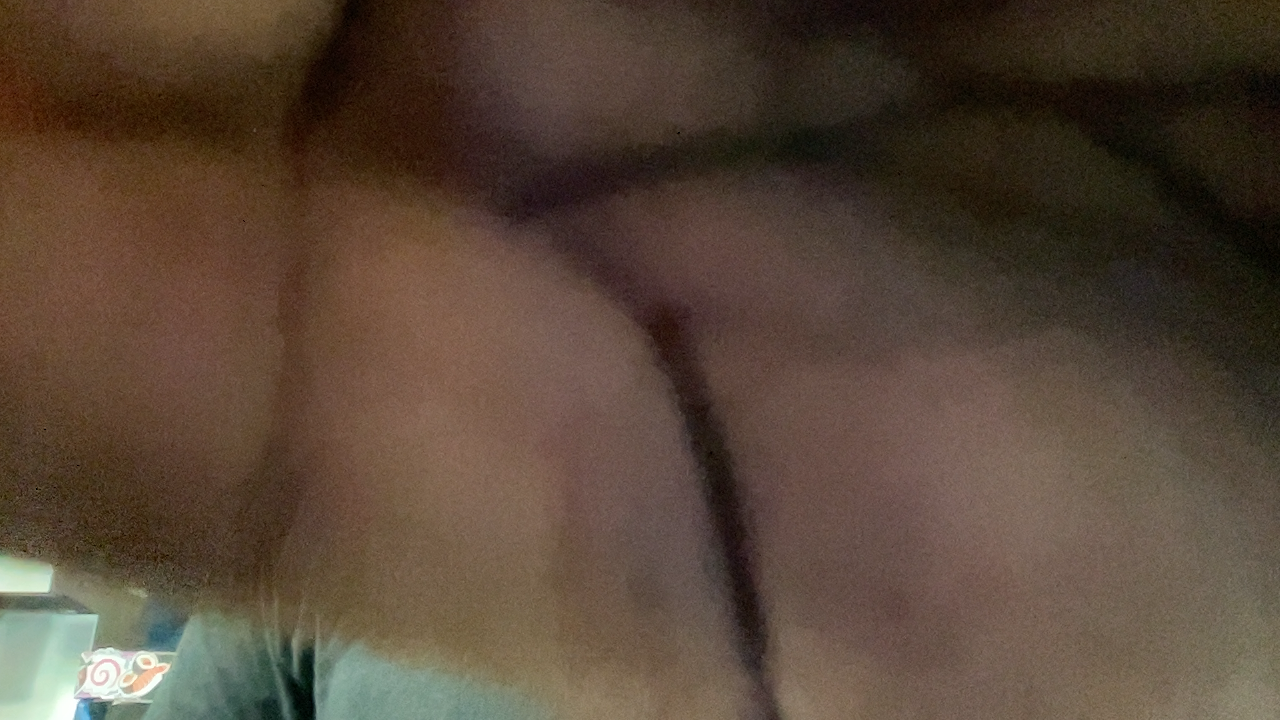

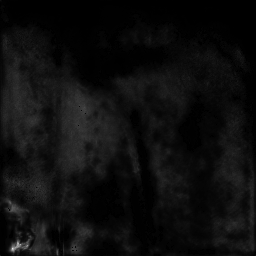

Image captured, background removed, and preprocessed.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 137ms/step
Predicted Class - G, Probability - 1.0000
G


In [18]:
# Capture an image, remove the background, and preprocess it
input_image, preprocessed_image = capture_and_preprocess()

# Check if the preprocessed image was successfully captured
if preprocessed_image is not None:
    # Display the input image
    display(IPImage(data=cv2.imencode('.png', input_image)[1].tobytes(), format='png'))

    # Display the preprocessed image
    display(IPImage(data=cv2.imencode('.png', preprocessed_image)[1].tobytes(), format='png'))

    print("Image captured, background removed, and preprocessed.")
else:
    print("Image capture failed.")


# Assuming 'preprocessed_image' is your preprocessed image
input_array = np.expand_dims(preprocessed_image, axis=0)

# Make predictions on the input image
predictions = cnn_model.predict(input_array)



# Get the class labels
class_labels = list(train_generator.class_indices.keys())

# Find the class label with the highest probability
predicted_class_index = np.argmax(predictions)
predicted_class_label = class_labels[predicted_class_index]
predicted_probability = predictions[0, predicted_class_index]

# Print the predicted class label and its probability
print(f"Predicted Class - {predicted_class_label}, Probability - {predicted_probability:.4f}")


print(predicted_class_label)

text_input = predicted_class_label
audio_output = text_to_speech(text_input)

audio_output